In [22]:
!pip install colorama

In [31]:
from IPython.core.displayhook import tokenize

import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
import string
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import seaborn as sns
from collections import OrderedDict 
import pandas as pd
from collections import Counter
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')
import colorama
from colorama import Fore, Style
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')


def Tokenize(text):
    tokens = word_tokenize(text.lower())
    print('Токенизированный текст: \n','\n'.join(tokens))
    return tokens

def Stop_words(tokens):
    # for w in set(stopwords.words("english")):
    #     print(w)
    # for l in list(string.punctuation):
    #     print(l)
    stop_words = set(stopwords.words("english") + list(string.punctuation)+["``"] + ["''"] + ["'s"] + ["'ll"] + ["..."])
    tokens_without_sw = [word for word in tokens if not word in stop_words]
    print('Токинизированный текст без стоп слов: \n','\n'.join(tokens_without_sw))
    return tokens_without_sw

def Popular_words(tokens_without_sw):
    fdist = nltk.FreqDist(tokens_without_sw)
    most_common = dict(fdist.most_common(10))
    #график
    plt.title('Топ встречающихся слов')
    plt.xlabel('количество слов в тексте')
    plt.barh(list(most_common.keys()), list(most_common.values()), color='lightgreen')
    return fdist.most_common(10)

def Counts_words(tokens_without_sw):
  tags = nltk.pos_tag(nltk.Text(tokens_without_sw), tagset='universal')
  tags_text = dict(Counter(tag for word, tag in tags).items())
  nouns = tags_text['NOUN']
  adjectives = tags_text['ADJ']
  print(f' \n В тексте встречается {nouns} cуществительных и {adjectives} прилагательных.')

def Text_sentences(text, popular_words):
  sentences = sent_tokenize(text)
  for token, count in popular_words:
    popular_sentences = []
    for item in sentences:
      if token in word_tokenize(item):
          popular_sentences.append(item)
    popular_sentences = '\n'.join(popular_sentences)    
    print(f"{token}:\n {popular_sentences}")

def Mood(text):
  mood = SentimentIntensityAnalyzer()
  neg_scores = 0
  neu_scores = 0
  pos_scores = 0
  for item in sent_tokenize(text):
    an = mood.polarity_scores(item)
    neg_scores+= an['neg']
    neu_scores+= an['neu']
    pos_scores+= an['pos']

  mood_dict={'негативное':neg_scores,
             'нейтральное':neu_scores,
             'позитивное':pos_scores  }

  d = OrderedDict(sorted(mood_dict.items(), key=lambda x: x[1]))
  values = list(d.values())
  keys = list(d.keys())
  plt.title('Настроение текста')
  plt.bar(range(len(d)),values,tick_label=keys)
  plt.show()
  if neg_scores == max(neg_scores,neu_scores,pos_scores):
    print('Текст негативный')
  elif neu_scores == max(neg_scores,neu_scores,pos_scores):
    print('Текст нейтральный')
  elif pos_scores == max(neg_scores,neu_scores,pos_scores):
    print('Текст позитивный')



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [32]:
#задать текст
text = '''
Once upon a time, there was a little girl living with her mom in a small thatched hut in a deserted hamlet. Her father had passed away when she was still young. So her mom and she had to work very hard to make ends meet.
One day, the mother fell ill . She told her daughter, "My dear daughter, call a doctor for me!" The little girl quickly left home with worries filling up her heart. Suddenly, she came across a snowy-haired old man. He asked her, "Why are you so much in hurry?" "I am looking for a doctor. My mother is very sick!" she cried.
The old man then told her, "I am a doctor! Take me to your home, I will cure your mother." When the old man arrived, after examining the mother, he told the girl, "Your mother's sickness is serious. I will try my best to cure her. Now, get to banyan tree by the woods. You'll find a daisy. Pick it up and bring it back to me!" It was bitterly cold outside, while the girl was only wearing a thin layer of clothes. She kept on walking and it was not until her feet felt worn that she reached the banyan tree. In front of her was a bush with a beautiful daisy. She picked it up and cherished it in her hands. All of a sudden, the old man's voice echoed in her ears, "Each petal represents a day your mother continues to live."
She looked down on the flower and counted, "One, Two, Three... Twenty! Oh, no! There are only twenty days left for my mother!"
Thinking for a while, she gently tore the petals into many small pieces. Each piece turned into a thin glossy petal. The twenty-petal daisy turned into a countless-petal flower. She rushed home with the strange flower. The old man was waiting for her at the door. He told her cheerfully, "Your mother has recovered. It is the reward for your pious heart." Ever since then, every year during the autumn, the flowers with many thin glossy petals blossom created a picturesque scenery. They are called the Chrysanthemum, the symbol of piety.
'''


In [33]:
#разбить текст на токены
tokens=Tokenize(text)


Токенизированный текст: 
 once
upon
a
time
,
there
was
a
little
girl
living
with
her
mom
in
a
small
thatched
hut
in
a
deserted
hamlet
.
her
father
had
passed
away
when
she
was
still
young
.
so
her
mom
and
she
had
to
work
very
hard
to
make
ends
meet
.
one
day
,
the
mother
fell
ill
.
she
told
her
daughter
,
``
my
dear
daughter
,
call
a
doctor
for
me
!
''
the
little
girl
quickly
left
home
with
worries
filling
up
her
heart
.
suddenly
,
she
came
across
a
snowy-haired
old
man
.
he
asked
her
,
``
why
are
you
so
much
in
hurry
?
''
``
i
am
looking
for
a
doctor
.
my
mother
is
very
sick
!
''
she
cried
.
the
old
man
then
told
her
,
``
i
am
a
doctor
!
take
me
to
your
home
,
i
will
cure
your
mother
.
''
when
the
old
man
arrived
,
after
examining
the
mother
,
he
told
the
girl
,
``
your
mother
's
sickness
is
serious
.
i
will
try
my
best
to
cure
her
.
now
,
get
to
banyan
tree
by
the
woods
.
you
'll
find
a
daisy
.
pick
it
up
and
bring
it
back
to
me
!
''
it
was
bitterly
cold
outside
,
while
the
girl
was


In [34]:
#убрать стоп-слова
tokens_without_sw = Stop_words(tokens)


Токинизированный текст без стоп слов: 
 upon
time
little
girl
living
mom
small
thatched
hut
deserted
hamlet
father
passed
away
still
young
mom
work
hard
make
ends
meet
one
day
mother
fell
ill
told
daughter
dear
daughter
call
doctor
little
girl
quickly
left
home
worries
filling
heart
suddenly
came
across
snowy-haired
old
man
asked
much
hurry
looking
doctor
mother
sick
cried
old
man
told
doctor
take
home
cure
mother
old
man
arrived
examining
mother
told
girl
mother
sickness
serious
try
best
cure
get
banyan
tree
woods
find
daisy
pick
bring
back
bitterly
cold
outside
girl
wearing
thin
layer
clothes
kept
walking
feet
felt
worn
reached
banyan
tree
front
bush
beautiful
daisy
picked
cherished
hands
sudden
old
man
voice
echoed
ears
petal
represents
day
mother
continues
live
looked
flower
counted
one
two
three
twenty
oh
twenty
days
left
mother
thinking
gently
tore
petals
many
small
pieces
piece
turned
thin
glossy
petal
twenty-petal
daisy
turned
countless-petal
flower
rushed
home
strange
flower
o

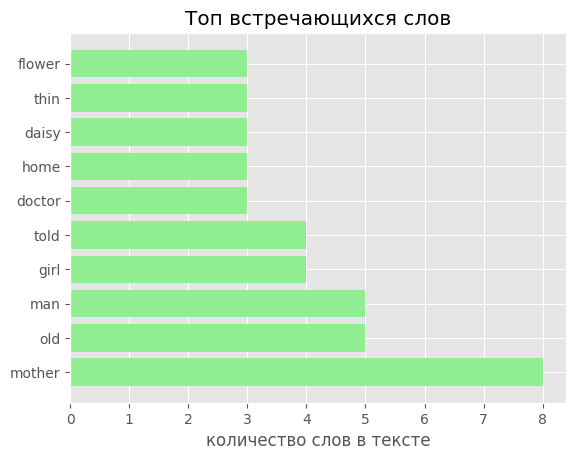

In [35]:
#Вывести часто встречающиеся слова
popular_words = Popular_words(tokens_without_sw)


In [36]:
#Посчитать существительные и прилагательные
Counts_words(tokens_without_sw)  


 
 В тексте встречается 71 cуществительных и 44 прилагательных.


In [37]:
#предложения с часто встречающимися словами
Text_sentences(text,popular_words)  


mother:
 One day, the mother fell ill . She told her daughter, "My dear daughter, call a doctor for me!"
My mother is very sick!"
Take me to your home, I will cure your mother."
When the old man arrived, after examining the mother, he told the girl, "Your mother's sickness is serious.
All of a sudden, the old man's voice echoed in her ears, "Each petal represents a day your mother continues to live."
There are only twenty days left for my mother!"
He told her cheerfully, "Your mother has recovered.
old:
 Suddenly, she came across a snowy-haired old man.
The old man then told her, "I am a doctor!
When the old man arrived, after examining the mother, he told the girl, "Your mother's sickness is serious.
All of a sudden, the old man's voice echoed in her ears, "Each petal represents a day your mother continues to live."
The old man was waiting for her at the door.
man:
 Suddenly, she came across a snowy-haired old man.
The old man then told her, "I am a doctor!
When the old man arrived, a

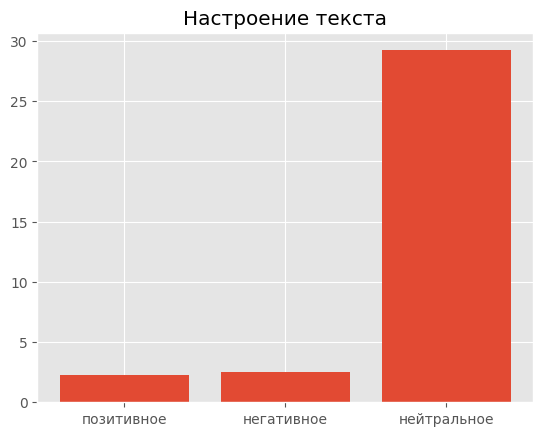

Текст нейтральный


In [38]:
#настроение текста
Mood(text)   
